<a href="https://colab.research.google.com/github/anupsubbu98/EDA-Kaggle/blob/master/IPL_2023_auction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os;
os.listdir('/kaggle/input/')

['ipl-2023-auction-analysis']

In [3]:
df = pd.read_csv('/kaggle/input/ipl-2023-auction-analysis/ipl_2023_auction_analysis.csv')  
df.head()

,Player Name,Base Price,Type,Cost in Rs. (CR),Cost in $ (K),2022 Squad,2023 Squad
0,Shivam Mavi,4000000,BOWLER,6.0,720.0,KKR,GT
1,Joshua Little,5000000,BOWLER,4.4,528.0,NaN,GT
2,Kane Williamson,20000000,BATSMAN,2.0,240.0,SRH,GT
3,K.S. Bharat,2000000,WICKETKEEPER,1.2,144.0,DC,GT
4,Mohit Sharma,5000000,BOWLER,0.5,60.0,NaN,GT


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player Name       568 non-null    object 
 1   Base Price        568 non-null    object 
 2   Type              568 non-null    object 
 3   Cost in Rs. (CR)  243 non-null    float64
 4   Cost in $ (K)     243 non-null    float64
 5   2022 Squad        230 non-null    object 
 6   2023 Squad        568 non-null    object 
dtypes: float64(2), object(5)
memory usage: 31.2+ KB


In [5]:
df.drop(columns={'Cost in $ (K)'},inplace=True)

In [6]:
df.rename(columns = {'Base Price':'Base Price (in cr.)'},inplace = True)

In [7]:
df['Base Price (in cr.)'] = df['Base Price (in cr.)'].apply(lambda x: '0' if x in('Retained') else x)

In [8]:
df['Base Price (in cr.)'] = df['Base Price (in cr.)'].astype(int)
df['Base Price (in cr.)'] = df['Base Price (in cr.)']/10000000
df.head()

,Player Name,Base Price (in cr.),Type,Cost in Rs. (CR),2022 Squad,2023 Squad
0,Shivam Mavi,0.4,BOWLER,6.0,KKR,GT
1,Joshua Little,0.5,BOWLER,4.4,NaN,GT
2,Kane Williamson,2.0,BATSMAN,2.0,SRH,GT
3,K.S. Bharat,0.2,WICKETKEEPER,1.2,DC,GT
4,Mohit Sharma,0.5,BOWLER,0.5,NaN,GT


In [9]:
df.isnull().sum()

Player Name              0
Base Price (in cr.)      0
Type                     0
Cost in Rs. (CR)       325
2022 Squad             338
2023 Squad               0
dtype: int64

In [10]:
df['Player Name'].unique()

array(['Shivam Mavi', 'Joshua Little', 'Kane Williamson', 'K.S. Bharat',
       'Mohit Sharma', 'Odean Smith', 'Urvil Patel', 'Rahul Tewatia',
       'Pradeep Sangwan', 'Rashid Khan', 'R. Sai Kishore', 'Yash Dayal',
       'Noor Ahmad', 'Wriddhiman Saha', 'Vijay Shankar', 'Shubman Gill',
       'Hardik Pandya', 'B. Sai Sudharsan', 'Alzarri Joseph',
       'Abhinav Sadarangani', 'Darshan Nalkande', 'David Miller',
       'Matthew Wade', 'Jayant Yadav', 'Mohammad Shami', 'Ben Stokes',
       'Kyle Jamieson', 'Nishant Sindhu', 'Ajinkya Rahane',
       'Bhagath Varma', 'Ajay Mandal', 'Shaik Rasheed', 'Ravindra Jadeja',
       'Rajvardhan Hangargekar', 'Prashant Solanki', 'Ruturaj Gaikwad',
       'Tushar Deshpande', 'Mukesh Choudhary', 'Subhranshu Senapati',
       'Simarjeet Singh', 'Shivam Dube', 'Matheesha Pathirana',
       'Devon Conway', 'Deepak Chahar', 'Ambati Rayudu',
       'Dwaine Pretorius', 'Maheesh Theekshana', 'Moeen Ali',
       'Mitchell Santner', 'MS Dhoni', 'Mukesh Kumar

In [11]:
df['Cost in Rs. (CR)'].unique()

array([ 6.  ,  4.4 ,  2.  ,  1.2 ,  0.5 ,  0.2 ,  0.  , 16.25,  1.  ,
        0.6 ,  5.5 ,  4.6 ,  2.4 ,  1.5 ,  0.9 , 18.5 ,  0.4 , 16.  ,
        0.75,  0.45, 17.5 ,  3.2 ,  1.9 ,  0.7 ,  5.75,  0.3 , 13.25,
        8.25,  5.25,  2.6 ,  1.8 ,  0.25,   nan])

In [12]:
df['Cost in Rs. (CR)'] = df['Cost in Rs. (CR)'].fillna(0)

In [13]:
print(df['2022 Squad'].unique())
print(df['2023 Squad'].unique())

['KKR' nan 'SRH' 'DC' 'PBKS' 'GT' 'CSK' 'LSG' 'MI' 'RCB' 'RR']
['GT' 'CSK' 'DC' 'KKR' 'PBKS' 'LSG' 'MI' 'RCB' 'RR' 'SRH' 'Unsold']


In [14]:
df['2022 Squad'] = df['2022 Squad'].fillna('Unsold')
df['2023 Squad'] = df['2023 Squad'].fillna('Unsold')

In [15]:
df.nunique()

Player Name            565
Base Price (in cr.)     10
Type                     4
Cost in Rs. (CR)        32
2022 Squad              11
2023 Squad              11
dtype: int64

In [16]:
df_Unsold_players = df[df['2023 Squad'] == 'Unsold']
df_Unsold_players.head()

,Player Name,Base Price (in cr.),Type,Cost in Rs. (CR),2022 Squad,2023 Squad
243,Tom Banton,2.0,WICKETKEEPER,0.0,Unsold,Unsold
244,Kusal Mendis,0.5,WICKETKEEPER,0.0,Unsold,Unsold
245,Chris Jordan,2.0,BOWLER,0.0,CSK,Unsold
246,Adam Milne,2.0,BOWLER,0.0,CSK,Unsold
247,Mujeeb Rahman,1.0,BOWLER,0.0,Unsold,Unsold


In [17]:
print(df['Player Name'].value_counts())

Akash Singh            2
Prince Yadav           2
Shivam Sharma          2
Shivam Mavi            1
Bharat Sharma          1
                      ..
Suyash Prabhudessai    1
Virat Kohli            1
Karn Sharma            1
Wanindu Hasaranga      1
Prenelan Subrayen      1
Name: Player Name, Length: 565, dtype: int64


In [18]:
df['Player Name'].value_counts()

Akash Singh            2
Prince Yadav           2
Shivam Sharma          2
Shivam Mavi            1
Bharat Sharma          1
                      ..
Suyash Prabhudessai    1
Virat Kohli            1
Karn Sharma            1
Wanindu Hasaranga      1
Prenelan Subrayen      1
Name: Player Name, Length: 565, dtype: int64

In [19]:
# Duplicates
df[df['Player Name'].isin(['Akash Singh','Prince Yadav','Shivam Sharma'])]

,Player Name,Base Price (in cr.),Type,Cost in Rs. (CR),2022 Squad,2023 Squad
316,Akash Singh,0.2,BOWLER,0.0,Unsold,Unsold
326,Shivam Sharma,0.2,BOWLER,0.0,Unsold,Unsold
362,Akash Singh,0.2,BATSMAN,0.0,Unsold,Unsold
393,Prince Yadav,0.2,BOWLER,0.0,Unsold,Unsold
534,Prince Yadav,0.2,ALL-ROUNDER,0.0,Unsold,Unsold
542,Shivam Sharma,0.2,ALL-ROUNDER,0.0,Unsold,Unsold


In [20]:
df['Type'].value_counts()

ALL-ROUNDER     213
BOWLER          189
BATSMAN          91
WICKETKEEPER     75
Name: Type, dtype: int64

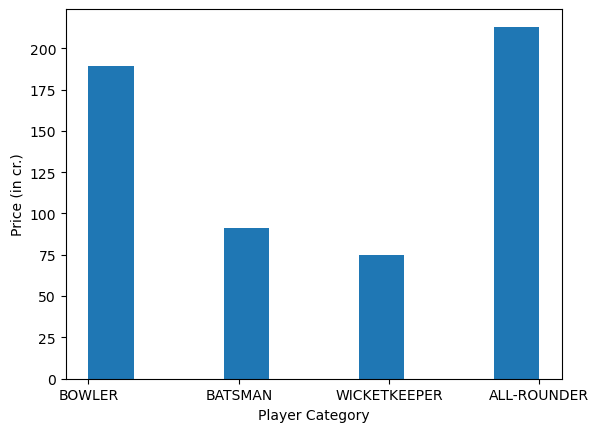

In [21]:
plt.hist(df['Type'])
plt.xlabel('Player Category')
plt.ylabel('Price (in cr.)')
plt.show()

(array([549.,   7.,   4.,   2.,   1.,   0.,   0.,   1.,   2.,   2.]),
 array([ 0.  ,  1.85,  3.7 ,  5.55,  7.4 ,  9.25, 11.1 , 12.95, 14.8 ,
        16.65, 18.5 ]),
 <BarContainer object of 10 artists>)

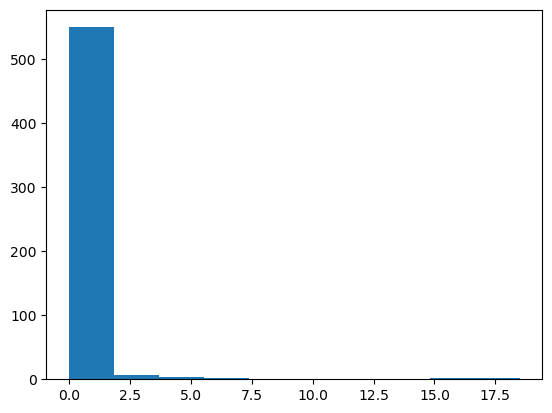

In [22]:
plt.hist(df['Cost in Rs. (CR)'],bins=10)

In [23]:
df['2023 Squad'].value_counts()

Unsold    325
GT         25
CSK        25
DC         25
LSG        25
RCB        25
RR         25
SRH        25
MI         24
KKR        22
PBKS       22
Name: 2023 Squad, dtype: int64

In [24]:
df_Sold_players = df[df['2023 Squad'] != 'Unsold']
df_Sold_players.head()

,Player Name,Base Price (in cr.),Type,Cost in Rs. (CR),2022 Squad,2023 Squad
0,Shivam Mavi,0.4,BOWLER,6.0,KKR,GT
1,Joshua Little,0.5,BOWLER,4.4,Unsold,GT
2,Kane Williamson,2.0,BATSMAN,2.0,SRH,GT
3,K.S. Bharat,0.2,WICKETKEEPER,1.2,DC,GT
4,Mohit Sharma,0.5,BOWLER,0.5,Unsold,GT


In [25]:
df_Sold_players.groupby('Type').agg({'Cost in Rs. (CR)':'count'})

,Cost in Rs. (CR)
Type,
ALL-ROUNDER,87
BATSMAN,41
BOWLER,85
WICKETKEEPER,30


In [26]:
# Total money spent on sold players by category-wise vs Base Price
print(df_Sold_players.groupby('Type')['Cost in Rs. (CR)'].sum())
print('\n\nTotal Base price of all players :\n')
print(df.groupby('Type')['Base Price (in cr.)'].sum())

Type
ALL-ROUNDER     70.75
BATSMAN         36.50
BOWLER          32.15
WICKETKEEPER    27.60
Name: Cost in Rs. (CR), dtype: float64


Total Base price of all players :

Type
ALL-ROUNDER     58.45
BATSMAN         28.50
BOWLER          48.35
WICKETKEEPER    21.75
Name: Base Price (in cr.), dtype: float64


*From above two cells we can say that eventhough bowlers were sold more than the batsmen, but overall price of the bowlers is very low compared to batsmen.*

In [27]:
df_top_15_expensive_picks = df_Sold_players.sort_values(by=['Cost in Rs. (CR)'],ascending = False).head(15)
df_top_15_expensive_picks

,Player Name,Base Price (in cr.),Type,Cost in Rs. (CR),2022 Squad,2023 Squad
97,Sam Curran,2.00,ALL-ROUNDER,18.50,Unsold,PBKS
144,Cameron Green,2.00,ALL-ROUNDER,17.50,Unsold,MI
25,Ben Stokes,2.00,ALL-ROUNDER,16.25,Unsold,CSK
119,Nicholas Pooran,2.00,WICKETKEEPER,16.00,SRH,LSG
218,Harry Brook,1.50,BATSMAN,13.25,Unsold,SRH
219,Mayank Agarwal,1.00,BATSMAN,8.25,PBKS,SRH
0,Shivam Mavi,0.40,BOWLER,6.00,KKR,GT
193,Jason Holder,2.00,ALL-ROUNDER,5.75,LSG,RR
50,Mukesh Kumar,0.20,BOWLER,5.50,Unsold,DC
220,Heinrich Klaasen,1.00,WICKETKEEPER,5.25,Unsold,SRH


In [28]:
x = pd.DataFrame(df_Sold_players[df_Sold_players['2023 Squad'] == 'MI'].groupby('Type').count()['Player Name']).reset_index()
x

,Type,Player Name
0,ALL-ROUNDER,12
1,BATSMAN,3
2,BOWLER,6
3,WICKETKEEPER,3


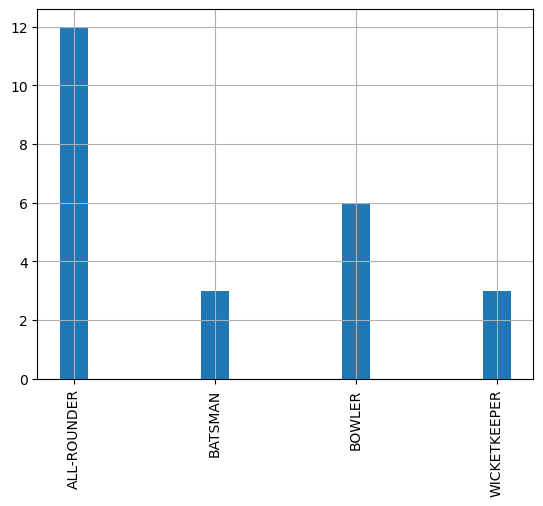

In [29]:
plt.bar(x['Type'],x['Player Name'],width=0.2)
plt.xticks(rotation ='vertical')
plt.grid()

<Axes: xlabel='2023 Squad', ylabel='count'>

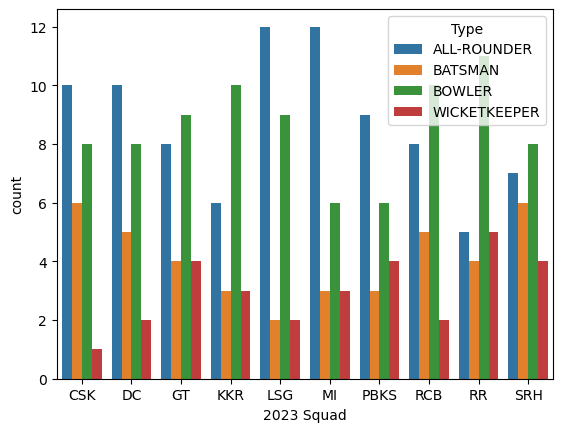

In [30]:
teams_df =  df_Sold_players.groupby(['Type','2023 Squad']).agg(count=('2023 Squad','count')).reset_index()
sns.barplot(data=teams_df, x='2023 Squad', y='count', hue='Type')

In [31]:
df_Sold_players.groupby(['Type','2023 Squad']).agg(count=('2023 Squad','count')).reset_index()

,Type,2023 Squad,count
0,ALL-ROUNDER,CSK,10
1,ALL-ROUNDER,DC,10
2,ALL-ROUNDER,GT,8
3,ALL-ROUNDER,KKR,6
4,ALL-ROUNDER,LSG,12
5,ALL-ROUNDER,MI,12
6,ALL-ROUNDER,PBKS,9
7,ALL-ROUNDER,RCB,8
8,ALL-ROUNDER,RR,5
9,ALL-ROUNDER,SRH,7
